In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']     ##用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False       ##用来正常显示负号

In [3]:
df =  pd.read_csv('./revenue2016-2021.csv',engine='python')

In [4]:
df.head()

,ds,y
0,2016/1/1,15242.0
1,2016/1/2,12636.0
2,2016/1/3,12680.0
3,2016/1/4,12156.0
4,2016/1/5,21382.5


In [5]:
df.shape

(2192, 2)

In [6]:
df['y'] = np.log(df['y'])

In [7]:
df

,ds,y
0,2016/1/1,9.631810
1,2016/1/2,9.444305
2,2016/1/3,9.447781
3,2016/1/4,9.405578
4,2016/1/5,9.970328
...,...,...
2187,2021/12/27,10.301978
2188,2021/12/28,9.878247
2189,2021/12/29,9.547705
2190,2021/12/30,9.626119


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2192 non-null   object 
 1   y       2192 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.4+ KB


In [9]:
df.describe()

,y
count,2192.000000
mean,9.865681
std,0.531692
min,7.044469
25%,9.577740
50%,9.947134
75%,10.242676
max,11.136245


(array([  1.,   2.,   2.,   6.,   5.,   8.,  13.,  21.,  45.,  80., 108.,
        180., 246., 303., 419., 330., 250., 138.,  29.,   6.]),
 array([ 7.0444691 ,  7.24905788,  7.45364665,  7.65823543,  7.8628242 ,
         8.06741297,  8.27200175,  8.47659052,  8.6811793 ,  8.88576807,
         9.09035684,  9.29494562,  9.49953439,  9.70412317,  9.90871194,
        10.11330072, 10.31788949, 10.52247826, 10.72706704, 10.93165581,
        11.13624459]),
 <BarContainer object of 20 artists>)

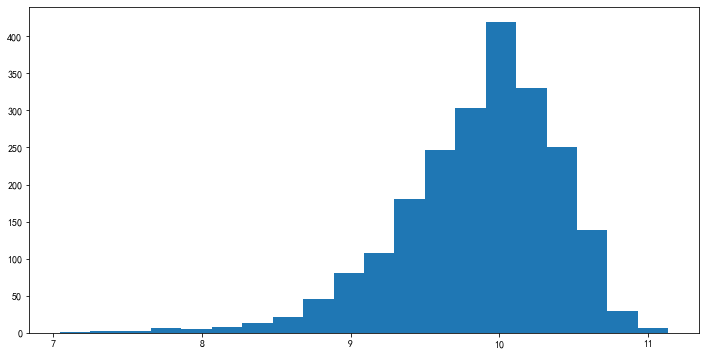

In [10]:
plt.figure(figsize=(12,6))
plt.hist(df['y'],bins=20)

In [11]:
df['ds'] = pd.to_datetime(df['ds'])

In [12]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [13]:
import seaborn as sns

Text(0, 0.5, '次数')

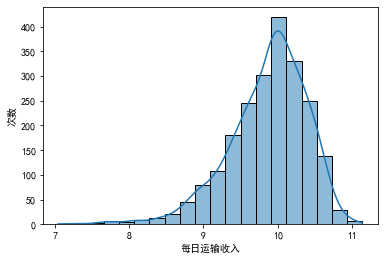

In [14]:
sns.histplot(data=df['y'],bins=20,kde=True)
plt.xlabel('每日运输收入')
plt.ylabel('次数')

No handles with labels found to put in legend.


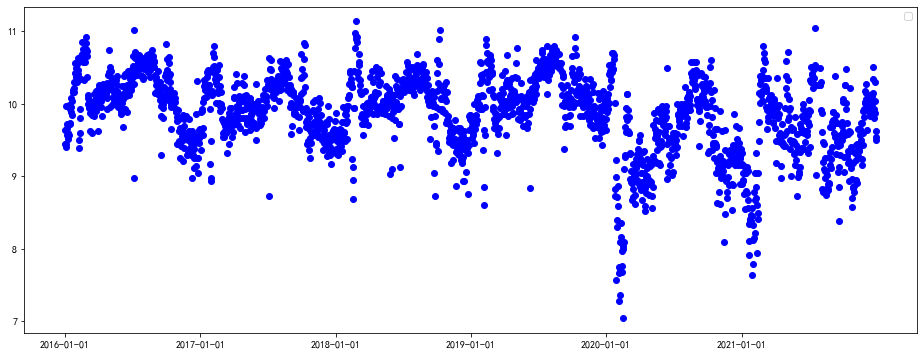

In [15]:
plt.figure(figsize=(16,6))
plt.scatter(df['ds'],df['y'],color='b')
plt.xticks(ticks=['2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
plt.legend()

<AxesSubplot:xlabel='ds'>

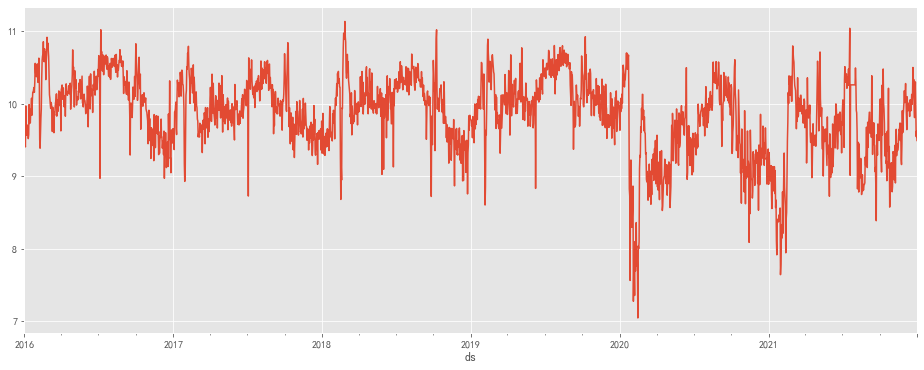

In [16]:
plt.rcParams['figure.figsize']=(16,6)
plt.style.use('ggplot')
df.set_index('ds').y.plot()

In [17]:
# 将2020年1-5月的数据设为缺失
#df.loc[(df['ds'] > '2020-01-01') & (df['ds'] < '2020-05-01'), 'y'] = None

In [21]:
#df['y'] = 20 - df['y']
#df['cap'] = 11.5
#df['floor'] = 7.5

In [35]:
df.head()

,ds,y,cap,floor
0,2016-01-01,9.631810,11.5,7.5
1,2016-01-02,9.444305,11.5,7.5
2,2016-01-03,9.447781,11.5,7.5
3,2016-01-04,9.405578,11.5,7.5
4,2016-01-05,9.970328,11.5,7.5


In [54]:
# 构建待预测日期数据框，periods = 365 代表除历史数据的日期外再往后推 365 天
m = Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True)  #每日、每周、每年周期性为True
m.fit(df)
future = m.make_future_dataframe(periods=365)   # periods = 365 代表除历史数据的日期外再往后推 365 天
#future['cap'] =11.5    # 预测值上限
#future['floor'] = 7.5   # 预测值下限
future.tail()   # 展示预测数据集最后5行

,ds
2552,2022-12-27
2553,2022-12-28
2554,2022-12-29
2555,2022-12-30
2556,2022-12-31


In [55]:
# 预测数据集
forecast = m.predict(future) #预测数据集
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend
2552,2022-12-27,9.580044,8.954597,10.244159,9.357551
2553,2022-12-28,9.546556,8.935327,10.136183,9.358013
2554,2022-12-29,9.573891,8.933390,10.195105,9.358476
2555,2022-12-30,9.583299,8.963837,10.182594,9.358939
2556,2022-12-31,9.590829,8.971238,10.227094,9.359401


In [31]:
forecast

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,9.929171,11.5,7.5,9.304107,10.401068,9.929171,9.929171,-0.039386,-0.039386,...,0.007281,0.007281,0.007281,-0.260774,-0.260774,-0.260774,0.0,0.0,0.0,9.889785
1,2016-01-02,9.928971,11.5,7.5,9.339732,10.432446,9.928971,9.928971,-0.031702,-0.031702,...,0.003595,0.003595,0.003595,-0.249405,-0.249405,-0.249405,0.0,0.0,0.0,9.897269
2,2016-01-03,9.928771,11.5,7.5,9.378869,10.500972,9.928771,9.928771,-0.003675,-0.003675,...,0.018915,0.018915,0.018915,-0.236697,-0.236697,-0.236697,0.0,0.0,0.0,9.925097
3,2016-01-04,9.928572,11.5,7.5,9.302190,10.419474,9.928572,9.928572,-0.052986,-0.052986,...,-0.044127,-0.044127,-0.044127,-0.222966,-0.222966,-0.222966,0.0,0.0,0.0,9.875586
4,2016-01-05,9.928372,11.5,7.5,9.460967,10.501602,9.928372,9.928372,0.028635,0.028635,...,0.023104,0.023104,0.023104,-0.208577,-0.208577,-0.208577,0.0,0.0,0.0,9.957007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2022-12-27,9.108592,11.5,7.5,8.517312,9.591174,9.102254,9.115420,-0.053147,-0.053147,...,0.023104,0.023104,0.023104,-0.290359,-0.290359,-0.290359,0.0,0.0,0.0,9.055444
2553,2022-12-28,9.108191,11.5,7.5,8.453667,9.545727,9.101824,9.115040,-0.088498,-0.088498,...,-0.014805,-0.014805,-0.014805,-0.287800,-0.287800,-0.287800,0.0,0.0,0.0,9.019692
2554,2022-12-29,9.107790,11.5,7.5,8.499128,9.589827,9.101394,9.114660,-0.063098,-0.063098,...,0.006038,0.006038,0.006038,-0.283243,-0.283243,-0.283243,0.0,0.0,0.0,9.044692
2555,2022-12-30,9.107389,11.5,7.5,8.497600,9.603117,9.100964,9.114285,-0.055315,-0.055315,...,0.007281,0.007281,0.007281,-0.276703,-0.276703,-0.276703,0.0,0.0,0.0,9.052074


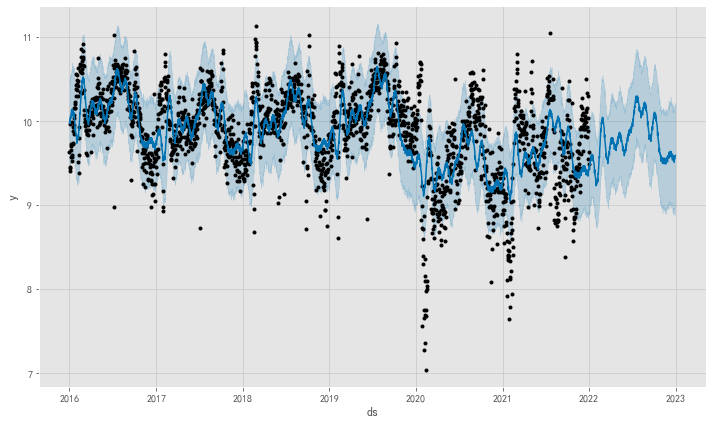

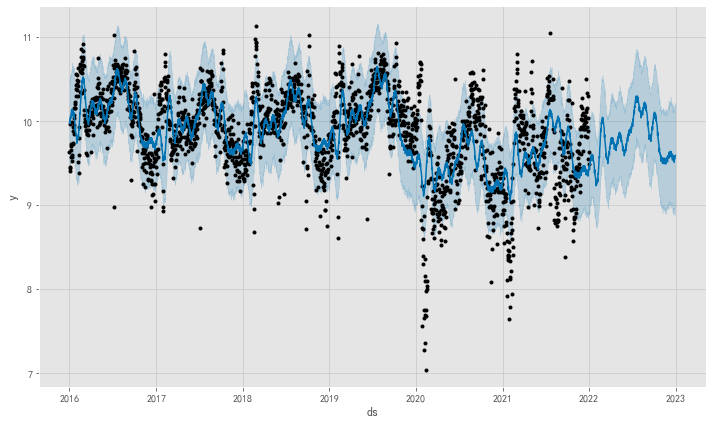

In [20]:
# 展示预测结果
m.plot(forecast)  # 展示预测结果

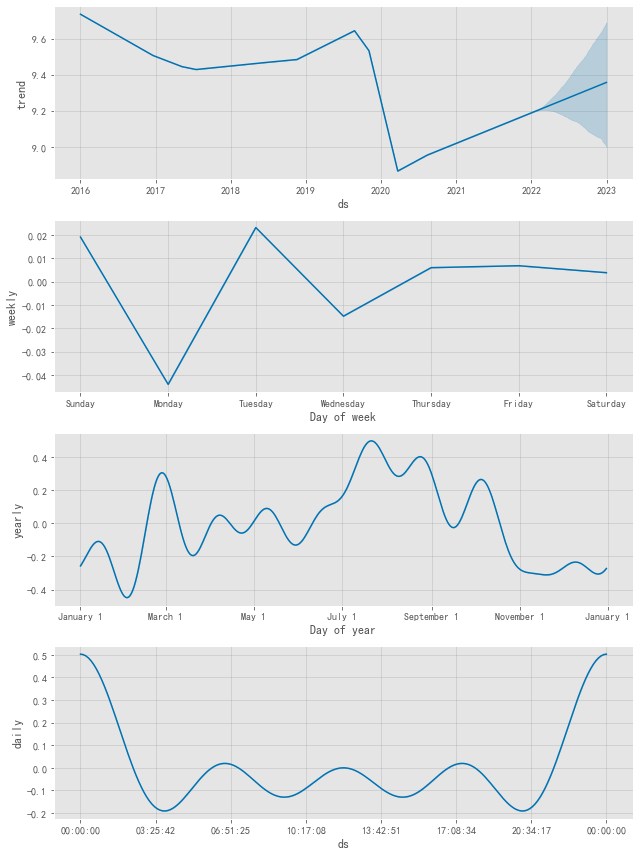

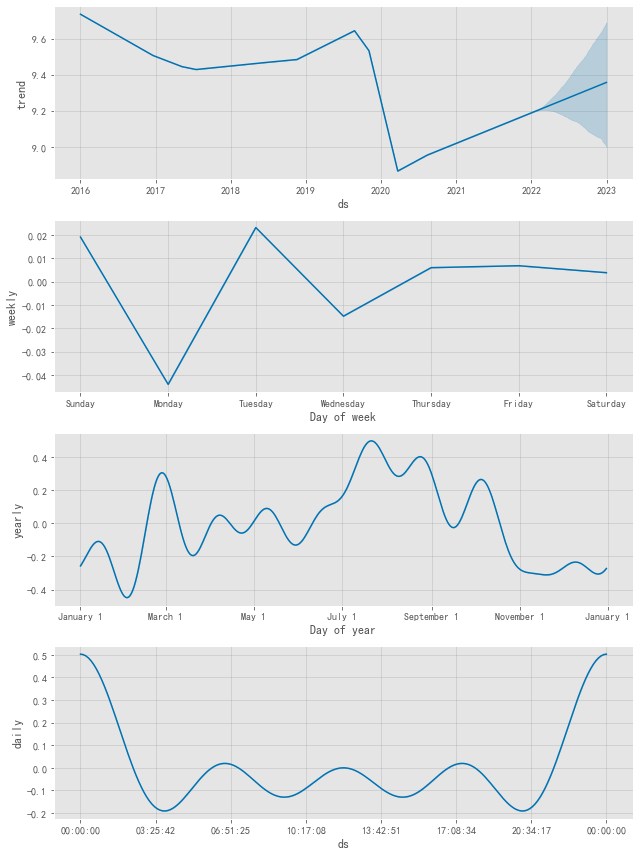

In [21]:
m.plot_components(forecast)   # 展示各个成分

In [22]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [24]:
#元旦
New_Year_Day = pd.DataFrame({
    'holiday' : 'New_Year_Day',
    'ds'  : pd.to_datetime(['2016-01-01', '2016-01-02', '2016-01-03',
                 '2016-12-31', '2017-01-01', '2017-01-02',
                 '2017-12-30', '2017-12-31', '2018-01-01',
                 '2018-12-30', '2018-12-31', '2019-01-01',
                 '2019-12-30', '2019-12-31','2020-01-01',
                 '2021-01-01','2021-01-02','2020-01-03',
                 '2022-01-01','2022-01-02','2022-01-03']),
    'lower_window' : 0,
    'upper_window' : 0
                
})
#春节
Chinese_New_Year = pd.DataFrame({
    'holiday' : 'Chinese_New_Year',
    'ds'  : pd.to_datetime(['2016-02-08', '2017-01-28', '2018-02-16',
                 '2019-02-05', '2020-01-25', '2021-02-12',
                 '2022-02-01']),
    'lower_window' : -15,
    'upper_window' : 25
                
})
#清明节
Tomb_Sweeping_Day = pd.DataFrame({
    'holiday' : 'Tomb_Sweeping_Day',
    'ds'  : pd.to_datetime(['2016-04-02', '2016-04-03', '2016-04-04',
                            '2017-04-02', '2017-04-03', '2017-04-04',
                            '2018-04-03', '2018-04-04', '2018-04-05',
                            '2019-04-03', '2019-04-04', '2019-04-05',
                            '2020-04-04', '2020-04-05', '2020-04-06',
                            '2021-04-03', '2021-04-04', '2021-04-05',
                            '2022-04-03', '2022-04-04', '2022-04-05']),
    'lower_window' : 0,
    'upper_window' : 0
                
})
#51节
Labor_Day = pd.DataFrame({
    'holiday' : 'Labor_Day',
    'ds'  : pd.to_datetime(['2016-05-01', '2017-05-01',
                            '2018-05-01', '2019-05-01', '2020-05-01',
                            '2021-05-01','2022-05-01']),
    'lower_window' : -1,
    'upper_window' : 1
                
})
#端午节
Dragon_Boat_Festival = pd.DataFrame({
    'holiday' : 'Dragon_Boat_Festival',
    'ds'  : pd.to_datetime(['2016-06-09', '2016-06-10', '2016-06-11',
                            '2017-05-28', '2017-05-29', '2017-05-30',
                            '2018-06-16', '2018-06-17', '2018-06-18',
                            '2019-06-07', '2019-06-08', '2019-06-09',
                            '2020-06-25', '2020-06-26', '2020-06-27',
                            '2021-06-12', '2021-06-13', '2021-06-14',
                            '2022-06-03', '2022-06-04', '2022-06-05']),
    'lower_window' : 0,
    'upper_window' : 0
                
})
#中秋节
Mid_Autumn_Festival = pd.DataFrame({
    'holiday' : 'Mid_Autumn_Festival',
    'ds'  : pd.to_datetime(['2016-09-15', '2016-09-16', '2016-09-17',
                            '2017-10-03', '2017-10-04', '2017-10-05',
                            '2018-09-22', '2018-09-23', '2018-09-24',
                            '2019-09-13', '2019-09-14', '2019-09-15',
                            '2020-10-01', '2020-10-02', '2020-10-03',
                            '2021-09-19', '2021-09-20', '2021-09-21',
                            '2022-09-10', '2022-09-11', '2022-09-12']),
    'lower_window' : 0,
    'upper_window' : 0
                
})
#国庆节
National_Day = pd.DataFrame({
    'holiday' : 'National_Day',
    'ds'  : pd.to_datetime(['2016-10-01', '2017-10-01', '2018-10-01',
                            '2019-10-01', '2020-10-01', '2021-10-01',
                            '2022-10-01'
                           ]),
    'lower_window' : 0,
    'upper_window' : 7
                
})

In [41]:
New_Year_Day

,holiday,ds,lower_window,upper_window
0,New_Year_Day,2016-01-01,0,0
1,New_Year_Day,2016-01-02,0,0
2,New_Year_Day,2016-01-03,0,0
3,New_Year_Day,2016-12-31,0,0
4,New_Year_Day,2017-01-01,0,0
5,New_Year_Day,2017-01-02,0,0
6,New_Year_Day,2017-12-30,0,0
7,New_Year_Day,2017-12-31,0,0
8,New_Year_Day,2018-01-01,0,0
9,New_Year_Day,2018-12-30,0,0


#51节
Labor_Day = pd.DataFrame({
    'holiday' : 'Labor_Day',
    'ds'  : pd.to_datetime(['2016-05-01', '2016-05-02', '2016-05-03',
                            '2016-05-04', '2017-04-30', '2017-05-01',
                            '2017-05-02', '2017-05-03', '2017-05-04',
                            '2018-05-01', '2018-05-02', '2018-05-03',
                            '2018-05-04', '2019-05-01', '2019-05-02',
                            '2019-05-03', '2019-05-04', '2020-05-01',
                            '2020-05-02', '2020-05-03', '2020-05-04',
                            '2020-05-05','2021-05-01','2021-05-02',
                            '2021-05-03','2021-05-04','2021-05-05',
                           '2022-04-30','2022-05-01','2022-05-02',
                            '2022-05-03','2022-05-04']),
    'lower_window' : 0,
    'upper_window' : 0
                
})

In [25]:
holidays = pd.concat((New_Year_Day, Chinese_New_Year, Tomb_Sweeping_Day, Labor_Day, Dragon_Boat_Festival, Mid_Autumn_Festival, National_Day))

In [43]:
forecast[(forecast['New_Year_Day'] + forecast['Chinese_New_Year']).abs() > 0][
        ['ds', 'New_Year_Day', 'Chinese_New_Year']][-50:]

,ds,New_Year_Day,Chinese_New_Year
1889,2021-03-04,0.000000,0.351837
1890,2021-03-05,0.000000,0.085981
1891,2021-03-06,0.000000,0.306349
1892,2021-03-07,0.000000,0.029053
1893,2021-03-08,0.000000,-0.006731
1894,2021-03-09,0.000000,0.056829
2192,2022-01-01,0.020949,0.000000
2193,2022-01-02,0.020949,0.000000
2194,2022-01-03,0.020949,0.000000
2208,2022-01-17,0.000000,0.605982


In [27]:
from fbprophet.plot import plot_yearly

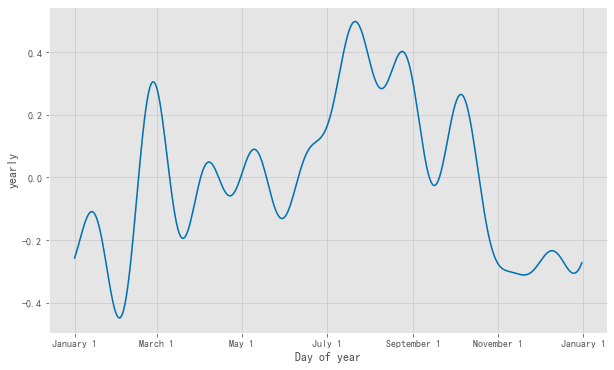

In [56]:
a =  plot_yearly(m)

In [28]:
def is_transport_season(ds):
    date = pd.to_datetime(ds)
    return (date.month ==1 or date.month == 2 or date.month == 3 or date.month == 4 or date.month == 5
            or date.month == 6 or date.month == 9 or date.month == 10 or date.month ==7 or date.month == 8)

df['on_season'] = df['ds'].apply(is_transport_season)
df['off_season'] = ~df['ds'].apply(is_transport_season)


In [29]:
#判断是否是周日
def transport_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6:
        return 1
    else:
        return 0
df['transport_sunday'] = df['ds'].apply(transport_sunday)


In [30]:
df

,ds,y,on_season,off_season,transport_sunday
0,2016-01-01,9.631810,True,False,0
1,2016-01-02,9.444305,True,False,0
2,2016-01-03,9.447781,True,False,1
3,2016-01-04,9.405578,True,False,0
4,2016-01-05,9.970328,True,False,0
...,...,...,...,...,...
2187,2021-12-27,10.301978,False,True,0
2188,2021-12-28,9.878247,False,True,0
2189,2021-12-29,9.547705,False,True,0
2190,2021-12-30,9.626119,False,True,0


In [65]:
m1 = Prophet(
    #mcmc_samples=500,
    daily_seasonality=True,
    holidays=holidays,
    yearly_seasonality=80,  #年周期影响力,傅里叶级数=80
    holidays_prior_scale=80,  #节假日影响力
    seasonality_prior_scale=80,  #季节影响力
    weekly_seasonality=False,   #周周期影响力
    #growth='logistic',
    changepoint_prior_scale=0.5  #增加趋势灵活性
    ) 
m1.add_seasonality(name='weekly_on_season', period=7, fourier_order=66, 
                  prior_scale=580,condition_name='on_season')
m1.add_seasonality(name='weekly_off_season', period=7, fourier_order=66, 
                  prior_scale=580,condition_name='off_season')
m1.add_regressor('transport_sunday')
m1.fit(df)
future = m1.make_future_dataframe(periods=365)
#future['cap'] =13
#future['floor'] = 6
future['on_season'] = future['ds'].apply(is_transport_season)
future['off_season'] = ~future['ds'].apply(is_transport_season)
future['transport_sunday'] = future['ds'].apply(transport_sunday)

In [66]:
# 预测数据集
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend
2552,2022-12-27,9.934554,7.382012,11.882901,9.303427
2553,2022-12-28,9.784058,7.297834,11.846047,9.303987
2554,2022-12-29,9.746081,7.303415,11.803731,9.304548
2555,2022-12-30,9.688564,7.201784,11.671831,9.305108
2556,2022-12-31,9.646982,7.135980,11.622749,9.305668


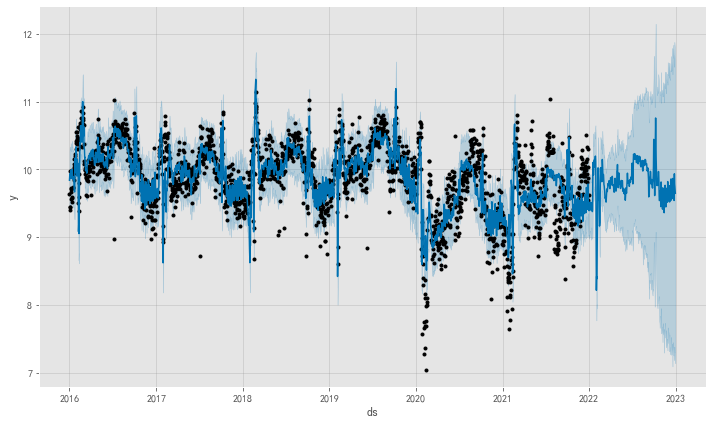

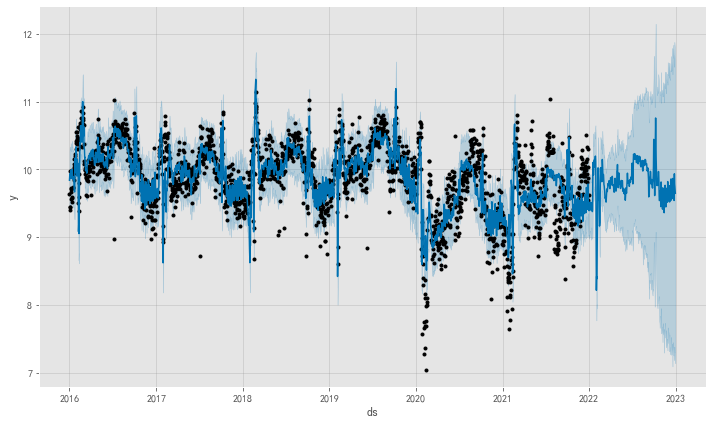

In [67]:
m1.plot(forecast)

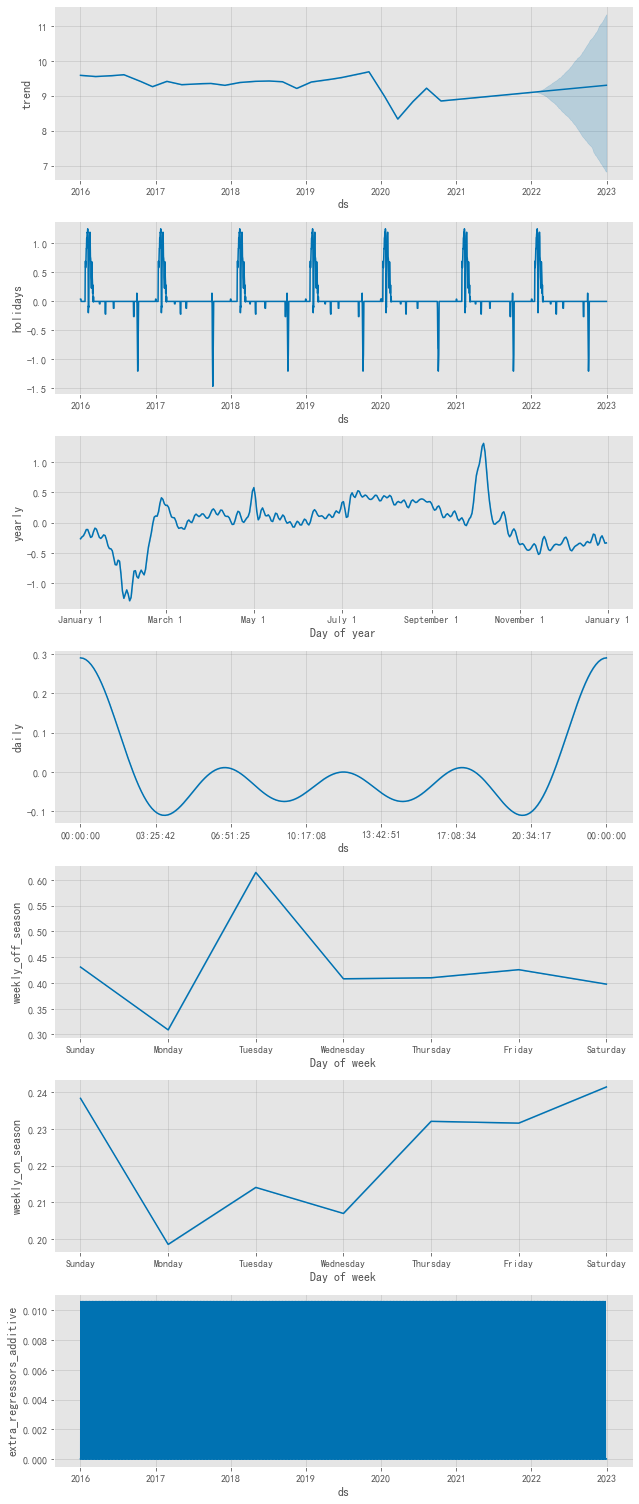

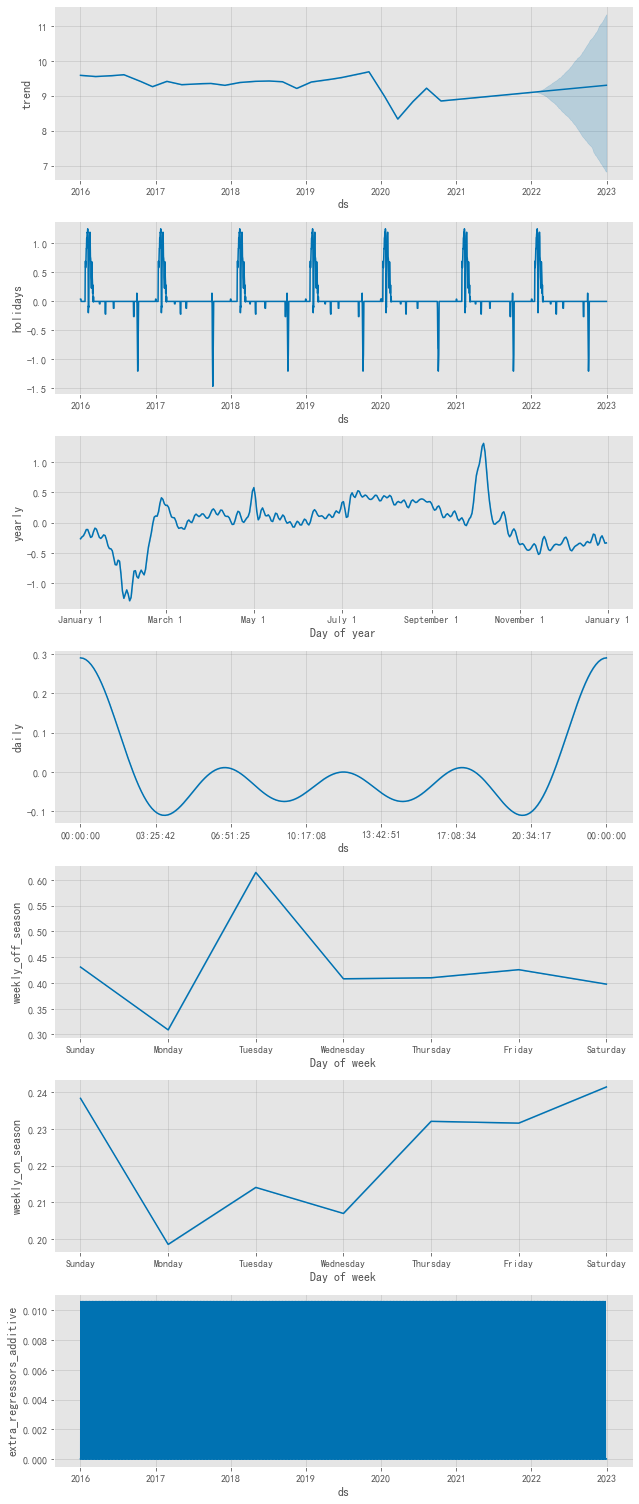

In [68]:
m1.plot_components(forecast)

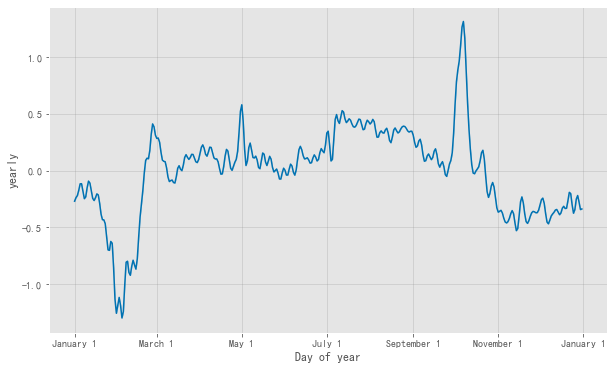

In [69]:
plot_yearly(m1)

In [70]:
#最后再转换
#forecast['yhat'] = np.exp(forecast['yhat'])
#forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
#forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])
#forecast.to_csv('forecast.csv',index_label=True)

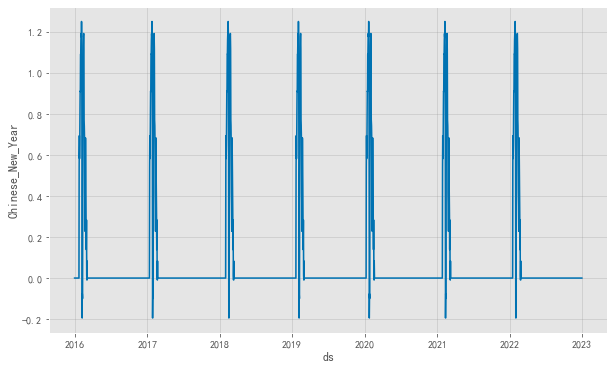

In [71]:
from fbprophet.plot import plot_forecast_component
plot_forecast_component(fcst=forecast,name='Chinese_New_Year',m=m1) #节假日影响力


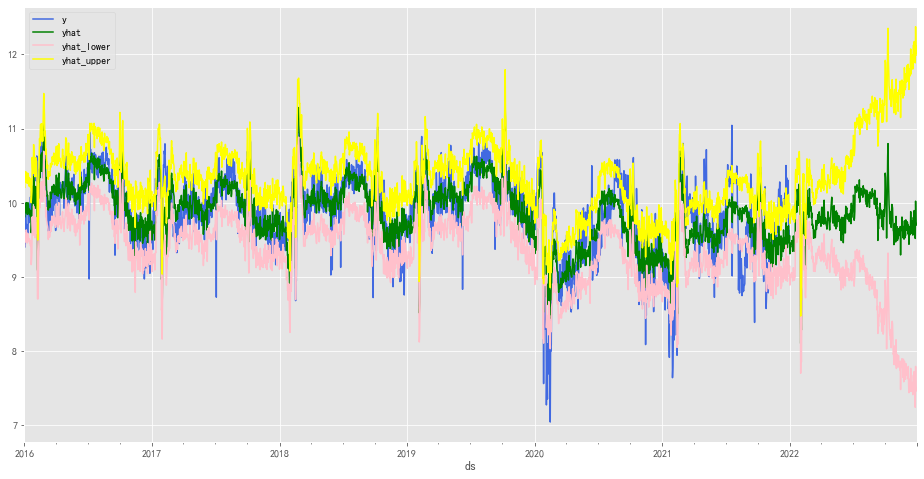

In [37]:
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_df = df[['ds', 'y']]
df_df = pd.merge(df_df, forecast_df, on='ds', how='right')
df_df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "green", "pink", "yellow"], grid=True);

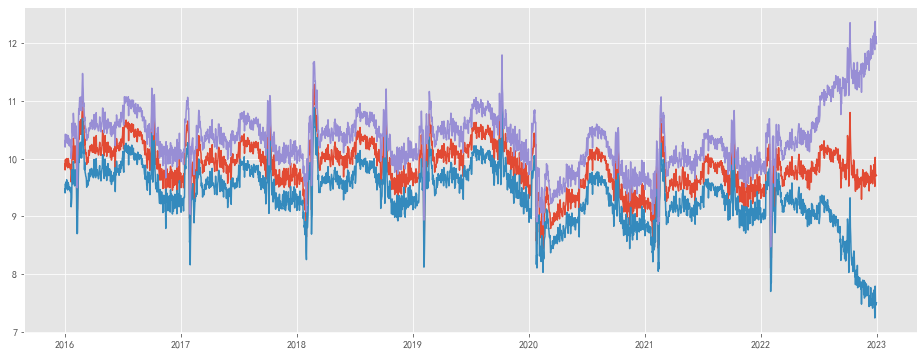

In [38]:
x1 = forecast['ds']
y1 = forecast['yhat']
y2 = forecast['yhat_lower']
y3 = forecast['yhat_upper']
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.show()

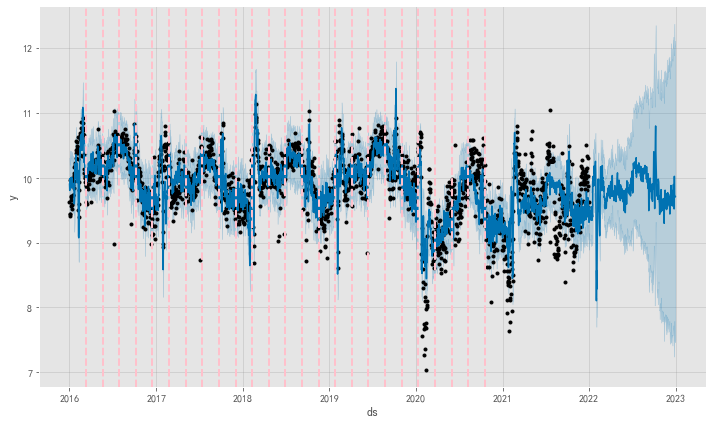

In [39]:
#趋势突变点
fig = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='pink', ls='--', lw=2)

In [ ]:
deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('变化率')
ax.set_xlabel('趋势突变点')
fig.tight_layout()

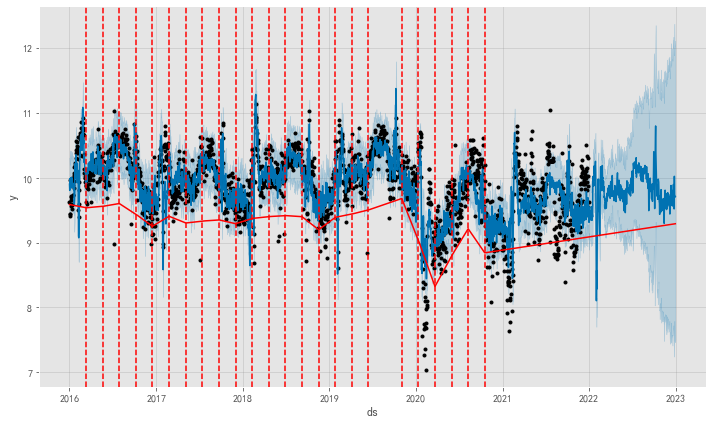

In [40]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast) #虚线处为给定时间序列中的变点

In [ ]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, horizon='365 days', initial='1825 days', period='365 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(20, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2017-01-01'),y=11, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2020-11-01'),y=11, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2021-01-01'),y=7, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
def reset_plot():
        
    # Restore default parameters
    plt.rcParams.update(plt.rcParamsDefault)
        
    # Adjust a few parameters to liking
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['text.color'] = 'k'

In [ ]:
changepoint_priors=[0.001, 0.05, 0.1, 0.2]
colors=['b', 'r', 'grey', 'gold']

In [ ]:
 for i, prior in enumerate(changepoint_priors):
            # Select the changepoint
            #changepoint_prior_scale = prior
            
            # Create and train a model with the specified cps
            m = Prophet(holidays=holidays,yearly_seasonality=10,weekly_seasonality=False,growth='logistic',
                        changepoint_prior_scale=prior)
            m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
            m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
            m.add_regressor('transport_sunday')
            m.fit(df)
            future = m.make_future_dataframe(periods=365)
            future['cap'] =11.5
            future['floor'] = 7.5
            future['on_season'] = future['ds'].apply(is_transport_season)
            future['off_season'] = ~future['ds'].apply(is_transport_season)
            future['transport_sunday'] = future['ds'].apply(transport_sunday)
           
            
            # Make a dataframe to hold predictions
            if i == 0:
                predictions = future.copy()
                
            future = m.predict(future)
            
            # Fill in prediction dataframe
            predictions['%.3f_yhat_upper' % prior] = future['yhat_upper']
            predictions['%.3f_yhat_lower' % prior] = future['yhat_lower']
            predictions['%.3f_yhat' % prior] = future['yhat']


        
# Plot set-up
reset_plot()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 1)
        
# Actual observations
ax.plot(df['ds'], df['y'], 'ko', ms = 4, label = 'Observations')
color_dict = {prior: color for prior, color in zip(changepoint_priors, colors)}

# Plot each of the changepoint predictions
for prior in changepoint_priors:
    # Plot the predictions themselves
    ax.plot(predictions['ds'], predictions['%.3f_yhat' % prior], linewidth = 1.2,
            color = color_dict[prior], label = '%.3f prior scale' % prior)
            
    # Plot the uncertainty interval
    ax.fill_between(predictions['ds'].dt.to_pydatetime(), predictions['%.3f_yhat_upper' % prior],
                    predictions['%.3f_yhat_lower' % prior], facecolor = color_dict[prior],
                    alpha = 0.3, edgecolor = 'k', linewidth = 0.6)
                            
# Plot labels
plt.legend(loc = 2, prop={'size': 10})
plt.xlabel('Date'); plt.ylabel('Stock Price ($)'); plt.title('Effect of Changepoint Prior Scale');

In [ ]:
df1 =  pd.read_csv('./test2016-2021.csv',engine='python')

In [ ]:
df1['y'] = np.log(df1['y'])

In [ ]:
df2 = df1.iloc[2192:,:]

In [ ]:
df2

In [ ]:
forecast2 = forecast.iloc[2192:,:][['ds','yhat']]

In [ ]:
forecast2

In [ ]:
forecast2 = forecast2.reset_index(drop=True)

In [ ]:
forecast2

In [ ]:
forecast2 = forecast2.reset_index()

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2

In [ ]:
forecast3 = forecast2.iloc[:124,:]

In [ ]:
forecast3

In [ ]:
test = pd.merge(df2,forecast3,on='index')

In [ ]:
test

In [ ]:
plt.figure(figsize=(26,10))
plt.plot(test['ds_x'],test['y'],c='b')
plt.plot(test['ds_x'],test['yhat'],c='r')

In [ ]:
plt.figure(figsize=(26,10))
plt.plot(test['ds_x'],test['y'],c='b')
plt.plot(test['ds_x'],test['yhat'],c='r')

In [ ]:
prediction_size = 365
train_df = df[:-prediction_size]
train_df.tail()

In [ ]:
m2 = Prophet(daily_seasonality=True,holidays=holidays,yearly_seasonality=200,holidays_prior_scale=200,
             seasonality_prior_scale=200,weekly_seasonality=False,growth='logistic',
             changepoint_prior_scale=0.5,seasonality_mode='multiplicative')
m2.add_seasonality(name='weekly_on_season', period=7, fourier_order=66, prior_scale=580,condition_name='on_season')
m2.add_seasonality(name='weekly_off_season', period=7, fourier_order=66, prior_scale=580,condition_name='off_season')
m2.add_regressor('transport_sunday')
m2.fit(train_df)
future2 = m2.make_future_dataframe(periods=prediction_size)
future2['cap'] =13
future2['floor'] = 6
future2['on_season'] = future2['ds'].apply(is_transport_season)
future2['off_season'] = ~future2['ds'].apply(is_transport_season)
future2['transport_sunday'] = future2['ds'].apply(transport_sunday)
forecast22 = m2.predict(future2)

m2 .plot(forecast22)

In [ ]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
cmp_df = make_comparison_dataframe(df, forecast22)
cmp_df.tail()

In [ ]:
def calculate_forecast_errors(df, prediction_size):
    df = df.copy()
    df['e'] = df['y'] - df['yhat']
    df['p'] = 1* df['e'] / df['y']
    predicted_part = df[-prediction_size:]
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)